In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from scipy.io import loadmat

def read_HSI():
    X = loadmat('/kaggle/input/hyerspectral-images-kennedy-space-center/Kennedy_space_center_dataset.mat')['KSC']
    y = loadmat('/kaggle/input/hyerspectral-images-kennedy-space-center/KSC_ground_truth.mat')['KSC_gt']
    print(f"X_shape: {X.shape}\ny_shape: {y.shape}")
    return X, y

X, y = read_HSI()

X_shape: (512, 614, 176)
y_shape: (512, 614)


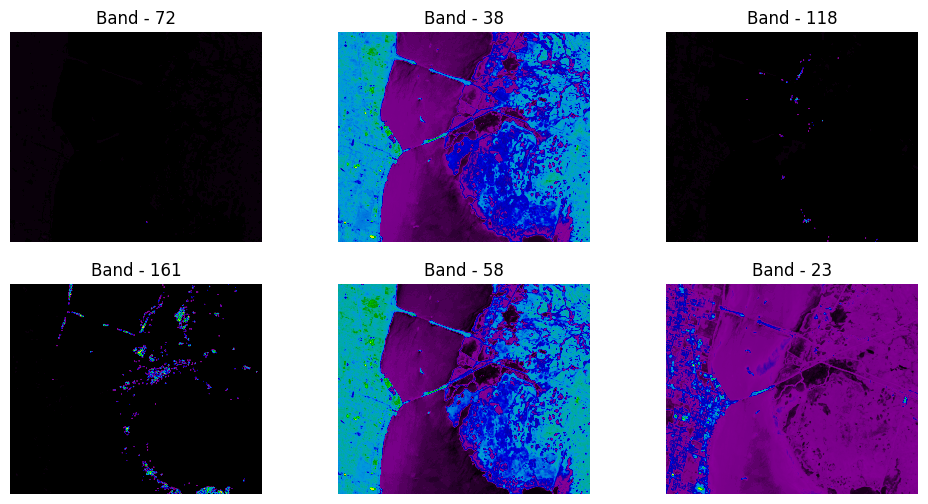

In [3]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('KSC_Bands.png')

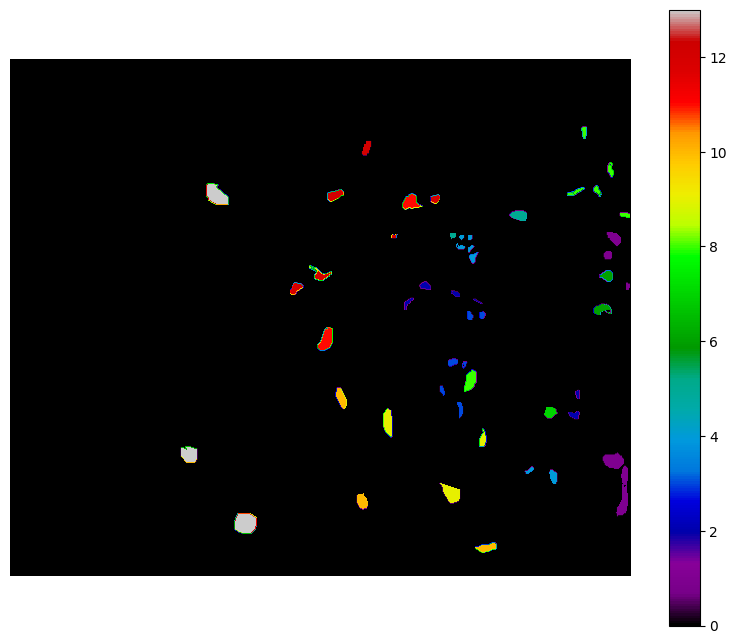

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('KSC_GT.png')
plt.show()

In [5]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(data = q)
    df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    df.to_csv('Dataset.csv')
    return df
  
df = extract_pixels(X, y)

In [6]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band168,band169,band170,band171,band172,band173,band174,band175,band176,class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0


In [7]:
df.shape

(314368, 177)

In [8]:
df['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

In [9]:
df['class'].value_counts()

class
0     309157
13       927
1        761
9        520
12       503
8        431
11       419
10       404
3        256
4        252
2        243
6        229
5        161
7        105
Name: count, dtype: int64

In [10]:
df_1 = df[df['class'] != 0]

In [15]:
df_2 = df[df['class'] == 0]

In [17]:
df_1

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band168,band169,band170,band171,band172,band173,band174,band175,band176,class
42318,12,26,21,18,21,22,23,28,27,29,...,40,37,45,39,38,42,28,36,28,8
42319,15,33,23,18,24,23,23,28,29,30,...,43,42,43,39,45,42,35,39,34,8
42320,8,33,20,18,22,22,25,28,28,30,...,36,31,34,30,29,35,35,30,31,8
42321,6,29,18,17,18,19,21,24,24,27,...,31,34,33,30,29,41,31,30,20,8
42931,12,29,21,19,20,22,23,25,26,29,...,34,42,27,36,40,39,31,27,34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299491,20,40,33,33,38,40,40,44,43,45,...,52,57,54,53,58,50,41,47,34,10
300098,15,35,25,23,28,29,29,32,32,34,...,17,17,9,18,13,16,9,9,14,10
300099,11,30,20,19,22,24,25,28,28,28,...,15,11,13,7,4,10,5,6,7,10
300100,18,32,26,23,26,28,27,30,32,31,...,10,22,15,18,17,13,16,17,10,10


In [16]:
df_2

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band168,band169,band170,band171,band172,band173,band174,band175,band176,class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314363,22,40,29,26,29,30,32,37,37,39,...,42,49,49,40,37,43,40,43,38,0
314364,26,40,31,26,32,33,34,39,41,43,...,46,43,44,37,41,37,36,28,28,0
314365,18,39,29,28,28,30,33,37,37,39,...,37,38,46,40,37,30,25,31,25,0
314366,22,38,27,22,28,28,31,35,36,39,...,44,38,46,40,35,37,33,40,28,0


In [12]:
df_1['class'].value_counts()

class
13    927
1     761
9     520
12    503
8     431
11    419
10    404
3     256
4     252
2     243
6     229
5     161
7     105
Name: count, dtype: int64

In [13]:
df_1.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176
count,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,...,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000
mean,139.524084,31.897908,24.743427,22.949338,27.185377,28.754366,29.819037,33.341201,33.974477,35.560353,...,66.247745,80.594895,69.191902,93.284398,78.432738,79.087699,52.602763,312.706007,112.214354,333.604299
std,2867.719351,6.860128,6.238078,6.108152,6.433253,6.845759,7.198480,7.642684,8.032535,8.314012,...,1283.235596,1571.379463,1283.204569,1814.187175,1571.408827,1571.383715,907.748660,4247.296201,2221.532809,4435.508217
min,0.000000,15.000000,10.000000,8.000000,12.000000,13.000000,15.000000,17.000000,16.000000,17.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,9.000000,28.000000,20.000000,18.000000,22.000000,23.000000,24.000000,27.000000,28.000000,29.000000,...,24.000000,25.000000,26.000000,25.000000,24.000000,24.000000,23.000000,21.000000,21.000000,17.000000
50%,13.000000,30.000000,24.000000,22.000000,26.000000,28.000000,29.000000,32.000000,33.000000,34.000000,...,36.000000,38.000000,38.000000,37.000000,34.000000,34.000000,33.000000,30.000000,30.000000,27.000000
75%,17.000000,36.000000,29.000000,27.000000,32.000000,34.000000,35.000000,39.000000,40.000000,42.000000,...,48.000000,50.000000,51.000000,49.000000,48.000000,48.000000,46.000000,42.000000,43.000000,38.000000
max,65534.000000,71.000000,64.000000,65.000000,71.000000,73.000000,77.000000,82.000000,83.000000,86.000000,...,65534.000000,65535.000000,65534.000000,65534.000000,65534.000000,65533.000000,65535.000000,65535.000000,65534.000000,65535.000000


In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5211 entries, 42318 to 300101
Columns: 177 entries, band1 to class
dtypes: uint16(176), uint8(1)
memory usage: 1.8 MB


In [29]:
df_1['class'].unique()

array([ 8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9], dtype=uint8)

In [42]:
df_1.shape

(5211, 177)

## PCA

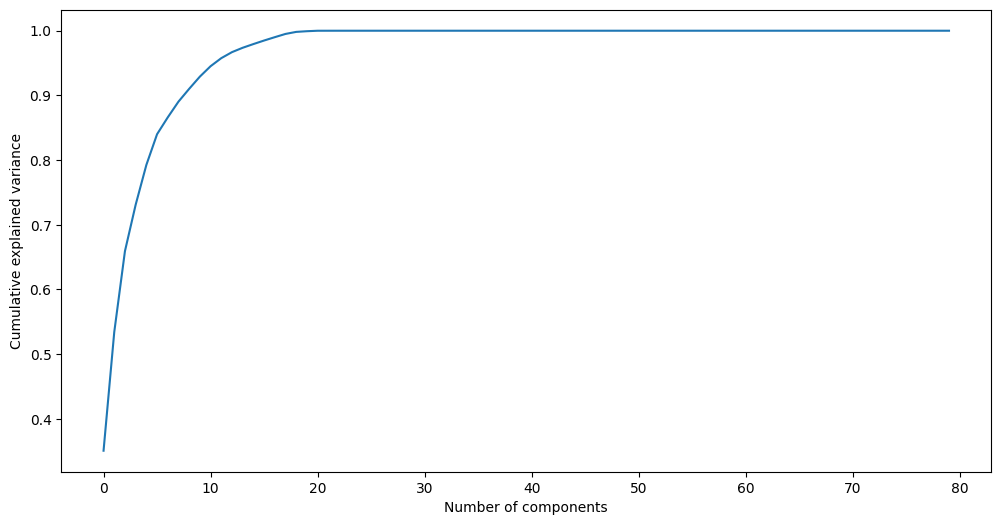

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 80)

principalComponents = pca.fit_transform(df_1.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [35]:
arr=y.ravel()


In [50]:
arr.shape

(314368,)

In [51]:
# Create a boolean mask to identify non-zero elements
mask = arr != 0

# Use the mask to filter out non-zero elements
f_arr = arr[mask]

In [52]:
f_arr.shape

(5211,)

In [55]:
# Choose 20 as number of components for PCA
pca = PCA(n_components = 20)
# dt = pca.fit_transform(df.iloc[:, :-1].values)
dt = pca.fit_transform(df_1.iloc[:, :-1].values)
# q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = arr)], axis = 1)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = f_arr)], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,21)]+['class']

In [56]:
q.shape

(5211, 21)

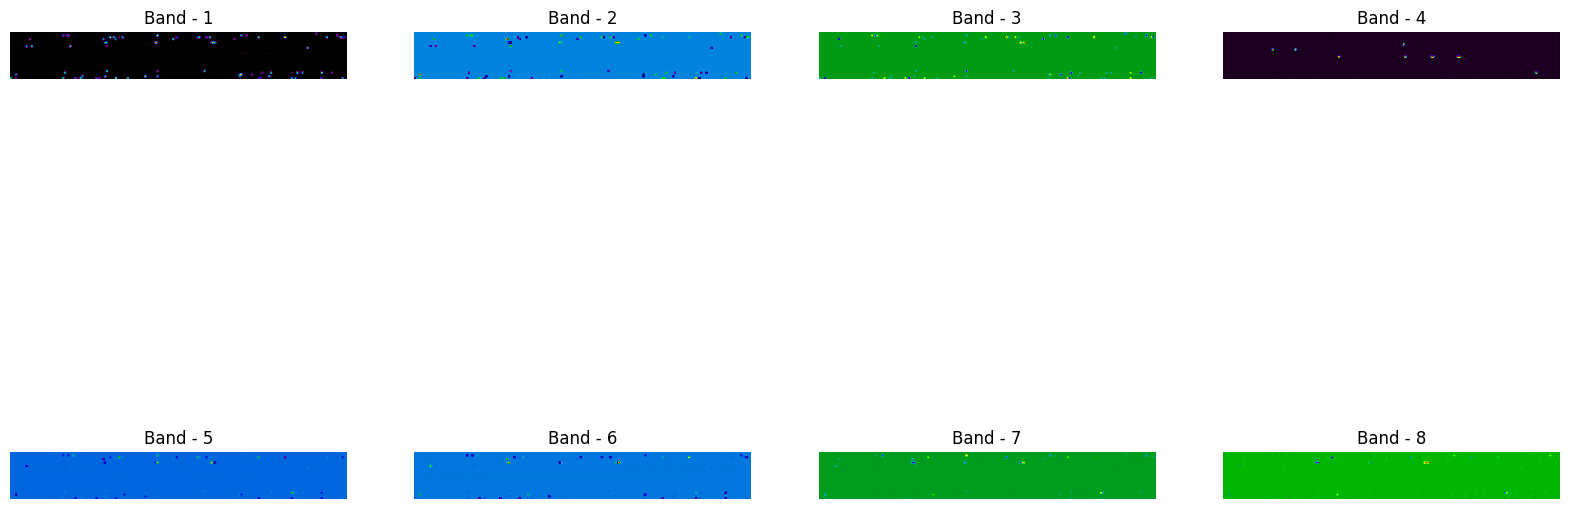

In [59]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(27, 193), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('KSC_PCA_Bands.png')

In [60]:
# saving to .csv
q.to_csv('KSC_90_PCA.csv', index=False)

# SVM and RF

In [40]:
X_t = loadmat('/kaggle/input/hyerspectral-images-kennedy-space-center/Kennedy_space_center_dataset.mat')['KSC']
y_t = loadmat('/kaggle/input/hyerspectral-images-kennedy-space-center/KSC_ground_truth.mat')['KSC_gt']

In [44]:
df_t = extract_pixels(X_t, y_t)

In [45]:
df_t.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band168,band169,band170,band171,band172,band173,band174,band175,band176,class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0


In [53]:
df_t['class'].value_counts()

class
0     309157
13       927
1        761
9        520
12       503
8        431
11       419
10       404
3        256
4        252
2        243
6        229
5        161
7        105
Name: count, dtype: int64

In [90]:
# x = q[q['class'] != 0]

X = q.iloc[:, :-1].values

y = q.loc[:, 'class'].values 

# names = ['Scrub', 'Willow swamp', 'Cabbage palm hammock', 'Cabbage palm/oak hammock', 'Slash pine',
#          'Oak/broadleaf hammock', 'Hardwood swamp', 'Graminoid marsh', 'Spartine marsh', 'Cattail marsh', 'Salt marsh',
# 'Mud flats', 'Water']

names = ['Scrub', 'Willow swamp', 'CP hammock', 'CP/oak', 'Slash pine',
         'Oak/broadleaf', 'Hardwood swamp', 'Graminoid marsh', 'Spartina marsh', 'Cattail marsh', 'Salt marsh',
'Mud flats', 'Water']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 120, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)
print(classification_report(y_test, ypred, target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.42      0.95      0.59       152
   Willow swamp       0.60      0.55      0.57        49
     CP hammock       0.00      0.00      0.00        51
         CP/oak       0.00      0.00      0.00        50
     Slash pine       0.50      0.03      0.06        32
  Oak/broadleaf       0.00      0.00      0.00        46
 Hardwood swamp       0.00      0.00      0.00        21
Graminoid marsh       0.54      0.33      0.41        86
 Spartina marsh       0.69      0.88      0.77       104
  Cattail marsh       0.63      0.69      0.66        81
     Salt marsh       1.00      0.93      0.96        84
      Mud flats       0.71      0.74      0.73       101
          Water       0.91      0.97      0.94       186

       accuracy                           0.65      1043
      macro avg       0.46      0.47      0.44      1043
   weighted avg       0.58      0.65      0.59      1043



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have X, y, and names defined as in your code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

# Define and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=11) # n_estimators=100
rf.fit(X_train, y_train)

# Make predictions
ypred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, ypred, target_names=names))


                 precision    recall  f1-score   support

          Scrub       0.91      0.92      0.92       152
   Willow swamp       0.78      0.80      0.79        49
     CP hammock       0.72      0.82      0.77        51
         CP/oak       0.50      0.56      0.53        50
     Slash pine       0.74      0.44      0.55        32
  Oak/broadleaf       0.62      0.50      0.55        46
 Hardwood swamp       0.68      0.71      0.70        21
Graminoid marsh       0.71      0.69      0.70        86
 Spartina marsh       0.86      0.91      0.88       104
  Cattail marsh       0.76      0.85      0.80        81
     Salt marsh       1.00      0.99      0.99        84
      Mud flats       0.87      0.84      0.85       101
          Water       1.00      0.97      0.99       186

       accuracy                           0.84      1043
      macro avg       0.78      0.77      0.77      1043
   weighted avg       0.84      0.84      0.84      1043



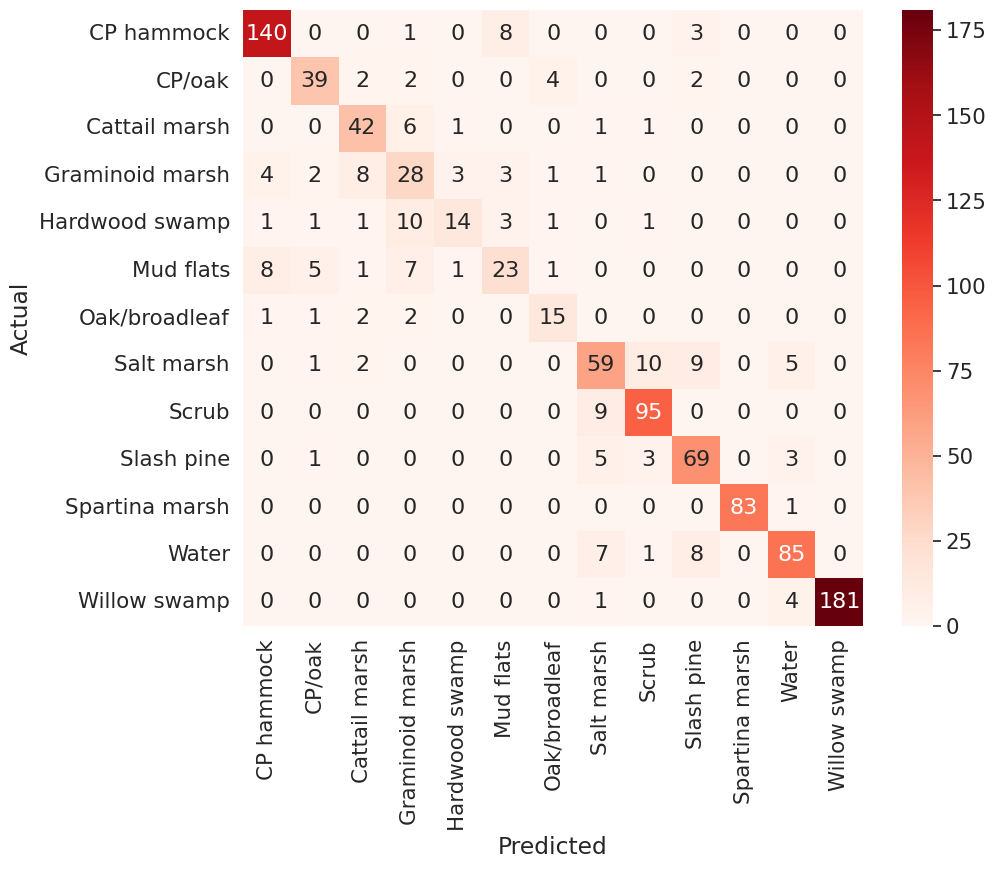

In [76]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [77]:
print(classification_report(y_test, ypred, target_names = names))

                 precision    recall  f1-score   support

          Scrub       0.91      0.92      0.92       152
   Willow swamp       0.78      0.80      0.79        49
     CP hammock       0.72      0.82      0.77        51
         CP/oak       0.50      0.56      0.53        50
     Slash pine       0.74      0.44      0.55        32
  Oak/broadleaf       0.62      0.50      0.55        46
 Hardwood swamp       0.68      0.71      0.70        21
Graminoid marsh       0.71      0.69      0.70        86
 Spartina marsh       0.86      0.91      0.88       104
  Cattail marsh       0.76      0.85      0.80        81
     Salt marsh       1.00      0.99      0.99        84
      Mud flats       0.87      0.84      0.85       101
          Water       1.00      0.97      0.99       186

       accuracy                           0.84      1043
      macro avg       0.78      0.77      0.77      1043
   weighted avg       0.84      0.84      0.84      1043

